<a href="https://colab.research.google.com/github/SilkSherstka/hse_text_analysis_and_visualization/blob/main/Lessson_26_02_2026_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip -q install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.4 MB/s eta 0:00:00


In [3]:
np.random.seed(42)  # фиксируем seed, чтобы у всех получились одинаковые данные
n = 260  # задаём количество документов в датасете

df = pd.DataFrame({  # создаём датафрейм
    "doc_id": range(1, n + 1),  # уникальный идентификатор документа от 1 до n
    "year": np.random.choice(  # генерируем год документа случайно из диапазона
        range(2018, 2026),  # возможные значения: 2018–2025 включительно
        size=n,  # количество сгенерированных значений равно n
        p=[0.08, 0.10, 0.12, 0.14, 0.14, 0.14, 0.14, 0.14],  # вероятности для каждого года
    ),  # завершаем генерацию year
    "genre": np.random.choice(  # генерируем жанр документа
        ["news", "blog", "academic", "fiction"],  # список жанров
        size=n,  # n значений жанра
        p=[0.35, 0.25, 0.25, 0.15],  # вероятности жанров (новости чаще)
    ),
    "source": np.random.choice(  # генерируем источник
        ["A", "B", "C", "D"],  # четыре источника
        size=n,  # n значений источника
        p=[0.30, 0.25, 0.25, 0.20],  # вероятности источников
    ),  # завершаем генерацию source
})  # заканчиваем создание DataFrame

tokens = np.random.lognormal(mean=7.2, sigma=0.9, size=n).astype(int)  # генерируем длину текстов с длинным хвостом
tokens = np.clip(tokens, 80, 18000)  # ограничиваем длины, чтобы не было экстремальных значений

unique_tokens = (tokens * np.random.uniform(0.18, 0.65, size=n)).astype(int)  # уникальные токены как доля от tokens с шумом
unique_tokens = np.clip(unique_tokens, 50, 8000)  # ограничиваем уникальные токены разумными границами

sentiment = np.clip(np.random.normal(loc=0.05, scale=0.65, size=n), -1, 1)  # генерируем условную “тональность” в диапазоне [-1; 1]

genre_shift = df["genre"].map({  # задаём небольшие сдвиги длины предложений по жанрам
    "news": 0.0,  # новости базовый уровень
    "blog": -1.0,  # блоги чуть короче предложения
    "academic": 2.0,  # академические чуть длиннее предложения
    "fiction": 1.0,  # художественные немного длиннее
}).values  # превращаем сдвиги в массив numpy

avg_sentence_len = np.random.normal(loc=18, scale=5.5, size=n) + genre_shift  # генерируем среднюю длину предложения и добавляем сдвиг жанра
avg_sentence_len = np.clip(avg_sentence_len, 5, 45)  # ограничиваем длину предложения разумным диапазоном

df["tokens"] = tokens  # добавляем колонку tokens
df["unique_tokens"] = unique_tokens  # добавляем колонку unique_tokens
df["sentiment"] = sentiment  # добавляем колонку sentiment
df["avg_sentence_len"] = avg_sentence_len  # добавляем колонку avg_sentence_len

df["ttr"] = df["unique_tokens"] / df["tokens"]  # считаем TTR = unique_tokens / tokens, TTR (Type–Token Ratio) — это простая метрика лексического разнообразия текста.

df.head()  # показываем первые строки таблицы

,doc_id,year,genre,source,tokens,unique_tokens,sentiment,avg_sentence_len,ttr
0,1,2021,academic,C,1943,433,0.551604,20.311575,0.222851
1,2,2025,fiction,B,7252,4296,-1.000000,21.913310,0.592388
2,3,2024,news,D,667,203,0.796698,17.612257,0.304348
3,4,2023,blog,D,436,105,-1.000000,19.675759,0.240826
4,5,2019,fiction,D,270,161,-0.185587,19.354609,0.596296


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   doc_id            260 non-null    int64  
 1   year              260 non-null    int64  
 2   genre             260 non-null    object 
 3   source            260 non-null    object 
 4   tokens            260 non-null    int64  
 5   unique_tokens     260 non-null    int64  
 6   sentiment         260 non-null    float64
 7   avg_sentence_len  260 non-null    float64
 8   ttr               260 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 18.4+ KB


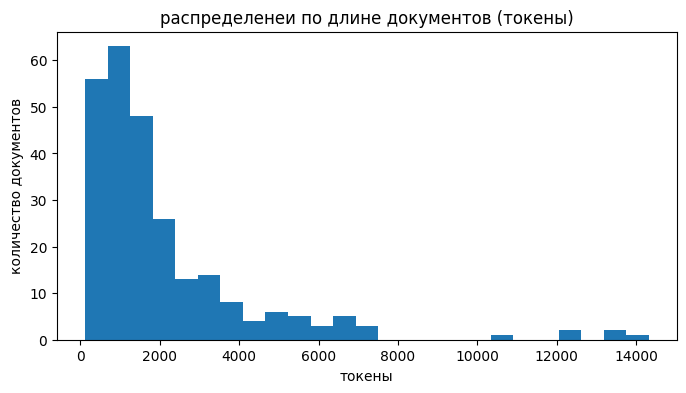

In [7]:
plt.figure(figsize=(8, 4))
plt.hist(df['tokens'], bins=25)
plt.title('распределенеи по длине документов (токены)')
plt.xlabel('токены')
plt.ylabel('количество документов')
plt.show()

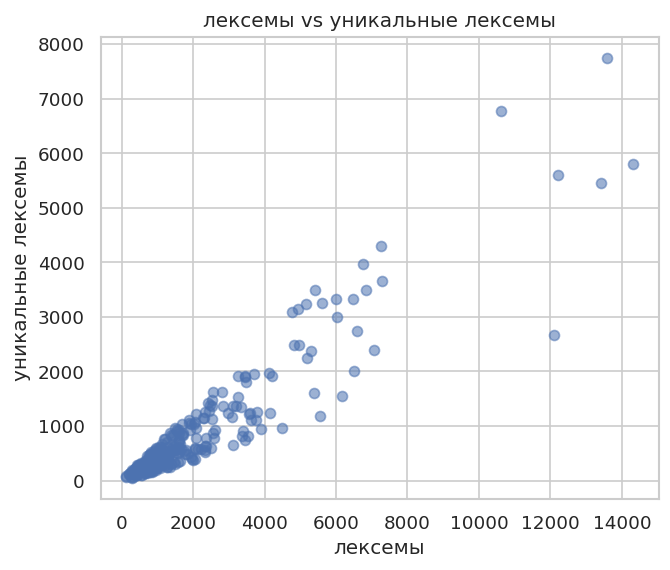

In [12]:
plt.rcParams['figure.dpi'] = 120
sns.set_theme(style='whitegrid')

plt.figure(figsize = (6,5))
plt.scatter(df['tokens'], df['unique_tokens'], alpha=0.55)
plt.title('лексемы vs уникальные лексемы')
plt.xlabel('лексемы')
plt.ylabel('уникальные лексемы')
plt.show()

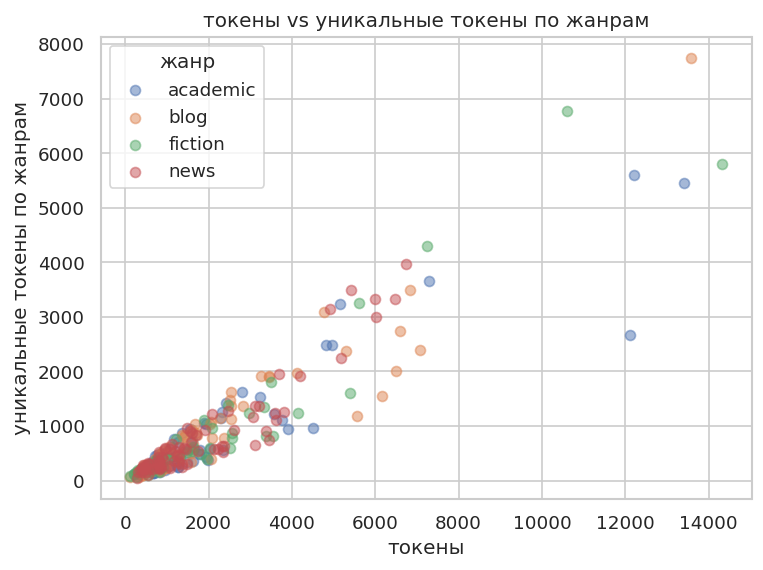

In [13]:
plt.figure(figsize =(7,5))
for g in sorted(df['genre'].unique()):
  sub = df[df['genre'] == g]
  plt.scatter(sub['tokens'],sub['unique_tokens'], alpha = 0.5, label = g)

plt.title('токены vs уникальные токены по жанрам')
plt.xlabel('токены')
plt.ylabel('уникальные токены по жанрам')
plt.legend(title = 'жанр')
plt.show()

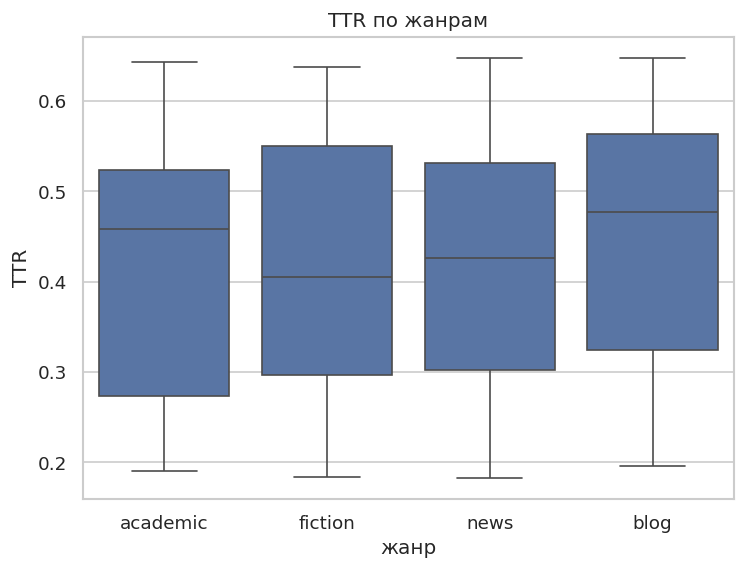

In [17]:
plt.figure(figsize =(7,5))
sns.boxplot(data=df, x='genre', y='ttr')
plt.title('TTR по жанрам')
plt.xlabel('жанр')
plt.ylabel('TTR')
plt.show()

In [19]:
yearly = df.groupby('year', as_index=False).agg(
    mean_tokens=('tokens', 'mean'),
    mean_sentence=('avg_sentence_len', 'mean'),
    mean_ttr=('ttr', 'mean'),
    n=('doc_id', 'count'),
)

yearly.sort_values('year').head(10)

,year,mean_tokens,mean_sentence,mean_ttr,n
0,2018,1809.909091,20.005007,0.430862,22
1,2019,2227.464286,18.632406,0.438629,28
2,2020,2406.142857,18.339112,0.384110,35
3,2021,2249.027778,19.745130,0.414944,36
4,2022,2358.166667,19.264283,0.391664,30
5,2023,1791.486486,19.784638,0.423848,37
6,2024,2070.548387,18.416053,0.410615,31
7,2025,1785.439024,17.133831,0.467342,41


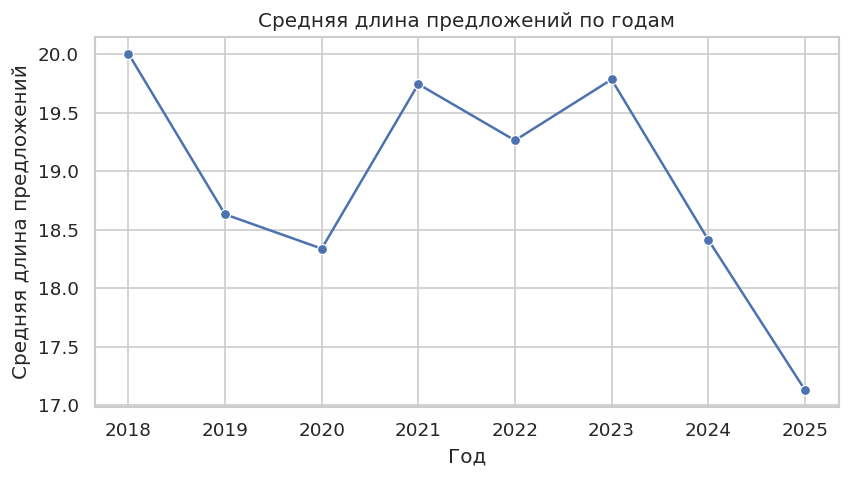

In [20]:
plt.figure(figsize=(8,4))
sns.lineplot(data=yearly, x='year', y='mean_sentence', marker='o')
plt.title('Средняя длина предложений по годам')
plt.xlabel('Год')
plt.ylabel('Средняя длина предложений')
plt.show()

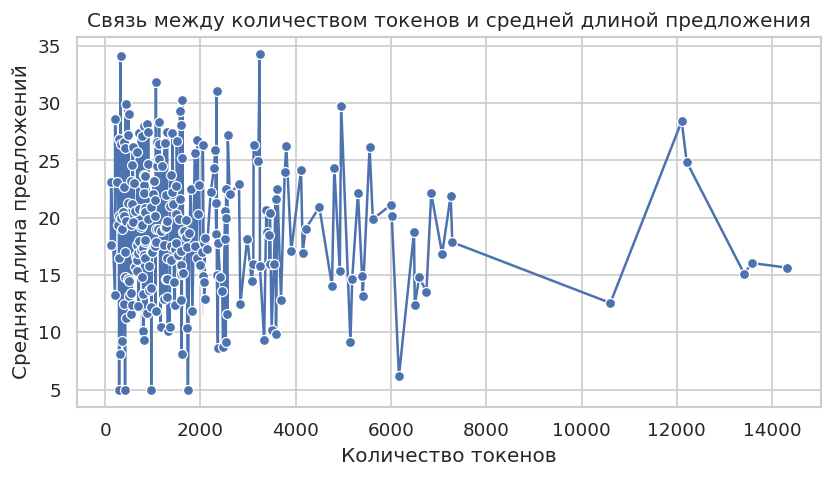

In [23]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df, x='tokens', y='avg_sentence_len', marker='o')
plt.title('Связь между количеством токенов и средней длиной предложения')
plt.xlabel('Количество токенов')
plt.ylabel('Средняя длина предложений')
plt.show()

In [24]:
terms = [f"term_{i}" for i in range(1,26)] #term_1 term_2

edges = pd.DataFrame({
    'src': np.random.choice(terms, 90),
    'dst': np.random.choice(terms, 90)
})

edges = edges[edges['src'] != edges['dst']]
edges = edges.drop_duplicates().head(70)

edges.head()

,src,dst
0,term_7,term_21
1,term_22,term_8
3,term_1,term_9
4,term_17,term_15
5,term_24,term_15


In [28]:
# такая штука нам вряд ли когда-либо пригодится

from pyvis.network import Network
from IPython.display import HTML

net = Network(height='520px', width='100%', bgcolor='#fffffff')

nodes = pd.unique(edges[['src', 'dst']].values.ravel('K'))

for node in nodes:
  net.add_node(node, label=node)

for _, row in edges.iterrows():
  net.add_edge(row['src'], row['dst'])

html_path = '/content/terns_network.html'
net.save_graph(html_path)

HTML(open(html_path, 'r', encoding='utf-8').read())

In [29]:
from google.colab import files  # импортируем модуль скачивания файлов из Colab

html_path = "/content/terms_network.html"  # путь к html
net.save_graph(html_path)  # сохраняем сеть в html

files.download(html_path)  # скачиваем html на компьютер и открываем двойным кликом в браузере

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>